**How data is generated**

Recorded Client and Luke scenario like audio in wav format of sample rate of 44100 Hz. And Noted down the conversation in text file as well.

Also, Adding noise to the recorded audio so that we can find the accuracy of the model.

-------------------

**How audio data is preprocessed**

------------------------

**Generating Transcibe from audio**

* *Speech recognition using whisper model*



```
# installing necessary libraries.
```



In [69]:
!pip install -q -U openai-whisper
!pip install -q git+https://github.com/openai/whisper.git 
!pip install -q --upgrade --no-deps --force-reinstall git+https://github.com/openai/whisper.git
!pip install -q setuptools-rust

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [70]:
#
folderPath = 'Dataset/'
fileName='testing3.wav'

In [71]:
import whisper
import time
import speech_recognition as sr

In [ ]:
model = whisper.load_model("base")

In [72]:
def wishperReadAudioFileAndProduceText(audioFile):
  startTime = time.time()
  result = model.transcribe(audioFile)
  endTime = time.time()
  processingTime = endTime - startTime
  return result['text'], round(processingTime, 2)

* *Speech recognition using recongize Google model*

In [73]:
!pip install -q SpeechRecognition

In [75]:
def googleReadAudioFileAndProduceText(audioFile):
  model = sr.Recognizer()
  with sr.AudioFile(audioFile) as source:
    audio_data = model.record(source)
    startTime = time.time() 
    result = model.recognize_google(audio_data)
    endTime = time.time()
    processingTime = endTime - startTime
  return result, round(processingTime, 2)

--------------

Evaluation these two model in terms of 
 - WER (Word Error Rate)
 - CER (Character Error Rate)
 - Confidense score
 - Speaker Diarization



 *Calculating WER*


In [76]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [77]:
def calculateWordErrorRate(actualTranscribe, ModelTranscribe):
  actual_transcribe_token = nltk.word_tokenize(actualTranscribe.lower())
  model_transcibe_token = nltk.word_tokenize(ModelTranscribe.lower())
  distance = nltk.edit_distance(actual_transcribe_token, model_transcibe_token)

  return round(distance/len(actual_transcribe_token), 2)*100



---



Reading Audio data file and transcript files to evaluate on metrics

In [78]:
import os
import pandas as pd

In [79]:
files = os.listdir(folderPath)
files_name_withoutExt = []
for item in files:
  if '.wav' in item:
    files_name_withoutExt.append(item.split(".")[0])

In [80]:
def readTxtFile(fileName):
  data = ''
  with open(fileName, 'r') as file:
    data = file.read().replace('\n', '')
  return data

In [81]:
texts = []
for item in files_name_withoutExt:
  whisper_val = wishperReadAudioFileAndProduceText(folderPath+item+".wav")
  google_val = googleReadAudioFileAndProduceText(folderPath+item+".wav")
  obj = {
      "sample_name": item,
      "whisper_text": whisper_val[0],
      "whisper_Process_Time": whisper_val[1],
      "google_text": google_val[0],
      "google_Process_Time": google_val[1],
      "actual_text": readTxtFile(folderPath+item+".txt")
  }
  texts.append(obj)

/usr/local/lib/python3.9/dist-packages/whisper/transcribe.py:114: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")
/usr/local/lib/python3.9/dist-packages/whisper/transcribe.py:114: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")
/usr/local/lib/python3.9/dist-packages/whisper/transcribe.py:114: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")
/usr/local/lib/python3.9/dist-packages/whisper/transcribe.py:114: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


In [82]:
df = pd.DataFrame.from_dict(texts)
df

,sample_name,whisper_text,whisper_Process_Time,google_text,google_Process_Time,actual_text
0,testing3,"Hi, thanks for meeting with me today. Of cour...",32.57,hi thanks for meeting with me today of course ...,21.78,"Hi, thanks for meeting with me today.Of course..."
1,testing1,"Hey, how it is going? Not too bad. Thanks for...",30.45,hey how it is going not too bad thanks for ask...,16.32,"Hey, how's it going?Not too bad, thanks for as..."
2,testing4,"Hi, thanks for meeting with me today. Of cour...",23.07,hi thanks for meeting with me today of course ...,25.28,"Hi, thanks for meeting with me today.Of course..."
3,testing2,"Hey, how was your day today? I was pretty bus...",21.82,hey how was your day today but it was pretty b...,24.62,"Hey, how was your day today?It was pretty busy..."


Calculating Error Rate:

In [83]:
W_WER=[]
G_WER = []
for idx in range(len(df)):
  W_WER.append(calculateWordErrorRate(df.loc[idx, "actual_text"], df.loc[idx, "whisper_text"]))
  G_WER.append(calculateWordErrorRate(df.loc[idx, "actual_text"], df.loc[idx, "google_text"]))
df['Whisper_WER'] = W_WER
df['Google_WER'] = G_WER

In [84]:
df

,sample_name,whisper_text,whisper_Process_Time,google_text,google_Process_Time,actual_text,Whisper_WER,Google_WER
0,testing3,"Hi, thanks for meeting with me today. Of cour...",32.57,hi thanks for meeting with me today of course ...,21.78,"Hi, thanks for meeting with me today.Of course...",13.0,24.0
1,testing1,"Hey, how it is going? Not too bad. Thanks for...",30.45,hey how it is going not too bad thanks for ask...,16.32,"Hey, how's it going?Not too bad, thanks for as...",15.0,26.0
2,testing4,"Hi, thanks for meeting with me today. Of cour...",23.07,hi thanks for meeting with me today of course ...,25.28,"Hi, thanks for meeting with me today.Of course...",11.0,34.0
3,testing2,"Hey, how was your day today? I was pretty bus...",21.82,hey how was your day today but it was pretty b...,24.62,"Hey, how was your day today?It was pretty busy...",14.0,25.0


Calculate Character Error Rate:

In [85]:
!pip -q install python-Levenshtein

In [86]:
import numpy as np
import Levenshtein

In [87]:
def calculateCharacterErrorRate(actualTranscribe, ModelTranscribe):
  actual_text = actualTranscribe.lower();
  model_text = ModelTranscribe.lower()
  distance = Levenshtein.distance(actual_text, model_text)
  cer = distance/ len(actual_text)
  return round(cer, 2)*100

In [88]:
W_CER=[]
G_CER = []
for idx in range(len(df)):
  W_CER.append(calculateCharacterErrorRate(df.loc[idx, "actual_text"], df.loc[idx, "whisper_text"]))
  G_CER.append(calculateCharacterErrorRate(df.loc[idx, "actual_text"], df.loc[idx, "google_text"]))
df['Whisper_CER'] = W_CER
df['Google_CER'] = G_CER

In [89]:
df

,sample_name,whisper_text,whisper_Process_Time,google_text,google_Process_Time,actual_text,Whisper_WER,Google_WER,Whisper_CER,Google_CER
0,testing3,"Hi, thanks for meeting with me today. Of cour...",32.57,hi thanks for meeting with me today of course ...,21.78,"Hi, thanks for meeting with me today.Of course...",13.0,24.0,4.0,9.0
1,testing1,"Hey, how it is going? Not too bad. Thanks for...",30.45,hey how it is going not too bad thanks for ask...,16.32,"Hey, how's it going?Not too bad, thanks for as...",15.0,26.0,4.0,7.0
2,testing4,"Hi, thanks for meeting with me today. Of cour...",23.07,hi thanks for meeting with me today of course ...,25.28,"Hi, thanks for meeting with me today.Of course...",11.0,34.0,3.0,21.0
3,testing2,"Hey, how was your day today? I was pretty bus...",21.82,hey how was your day today but it was pretty b...,24.62,"Hey, how was your day today?It was pretty busy...",14.0,25.0,5.0,13.0


-------------

Exploratory Data Analysis

In [90]:
import matplotlib.pyplot as plt
import seaborn as sb

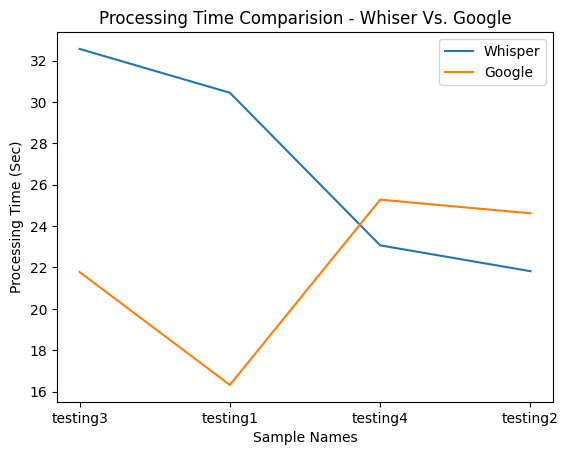

In [91]:
fig, ax = plt.subplots()
ax.plot(df['sample_name'], df['whisper_Process_Time'], label='Whisper')
ax.plot(df['sample_name'], df['google_Process_Time'], label='Google')
ax.set_xlabel('Sample Names')
ax.set_ylabel('Processing Time (Sec)')
ax.set_title('Processing Time Comparision - Whiser Vs. Google')
ax.legend()
plt.show()

It clearly visible in line chart, that Google model is taking less time in 3 of the samples, however this variable is also depended on the internet speed as well (for this current scenario, internet speed is fairly good.)

Word Error rate:

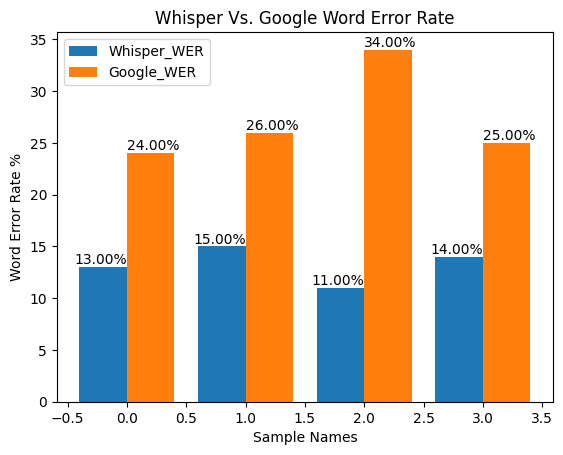

In [92]:
fig, ax = plt.subplots()
bar_width = 0.35
opacity = 0.8

X_axis = np.arange(len(df['sample_name']))
  
plt.bar(X_axis - 0.2, df['Whisper_WER'], 0.4, label = 'Whisper_WER')
plt.bar(X_axis + 0.2, df['Google_WER'], 0.4, label = 'Google_WER')
  
for i, v in enumerate(df['Whisper_WER']):
    ax.text(i, v, f'{v:.2f}%', ha='right', va='bottom', fontsize=10, color='black')
    
for i, v in enumerate(df['Google_WER']):
    ax.text(i, v, f'{v:.2f}%', ha='left', va='bottom', fontsize=10, color='black')
ax.set_xlabel('Sample Names')
ax.set_ylabel('Word Error Rate %')
ax.set_title('Whisper Vs. Google Word Error Rate')
ax.legend()
plt.show()

Character Error Rate:

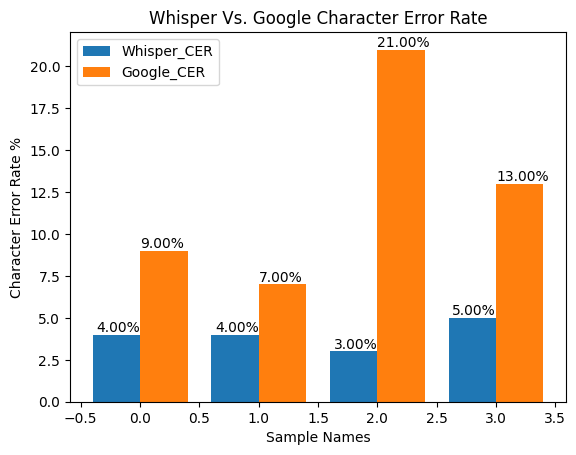

In [93]:
fig, ax = plt.subplots()
bar_width = 0.35
opacity = 0.8

X_axis = np.arange(len(df['sample_name']))
  
plt.bar(X_axis - 0.2, df['Whisper_CER'], 0.4, label = 'Whisper_CER')
plt.bar(X_axis + 0.2, df['Google_CER'], 0.4, label = 'Google_CER')
  
for i, v in enumerate(df['Whisper_CER']):
    ax.text(i, v, f'{v:.2f}%', ha='right', va='bottom', fontsize=10, color='black')
    
for i, v in enumerate(df['Google_CER']):
    ax.text(i, v, f'{v:.2f}%', ha='left', va='bottom', fontsize=10, color='black')
ax.set_xlabel('Sample Names')
ax.set_ylabel('Character Error Rate %')
ax.set_title('Whisper Vs. Google Character Error Rate')
ax.legend()
plt.show()

------

In [98]:
from transformers import pipeline
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
summarizer = pipeline("summarization")


No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [103]:
summary_text = summarizer(df['whisper_text'][2], max_length=150, min_length=5, do_sample=False)
print(summary_text)

[{'summary_text': " Insurance agent: I wanted to discuss your current insurance policy and make sure it's still meeting your needs . With new employees, you may want to consider increasing your workers' compensation coverage . I can provide you with a code for the additional coverage as well as potential discounts ."}]


In [ ]:
######################

In [4]:
!wget  https://groups.inf.ed.ac.uk/ami//ICSIsignals/NXT/Bdb001.interaction.wav
!wget  https://groups.inf.ed.ac.uk/ami//download/temp/icsiBuild-233213-Wed-Apr-5-2023.manifest.txt
!wget  https://groups.inf.ed.ac.uk/ami//download/temp/../CCBY4.0.txt

'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
